In [1]:
import gym
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def displayImage(image, step, reward):
    plt.title(f"step {step} reward {reward:0.1f}")
    plt.imshow(image)
    plt.show()

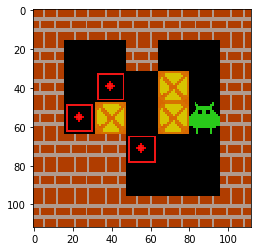

In [3]:
from a_star_search import load_model

model = load_model('benchmark/models/DAVI_steps_12_7x7_3.pth')
env = gym.make('Sokoban-small-v1')
plt.imshow(env.render('rgb_array'))
plt.show()

In [4]:
from a_star_search import search_way
from gym_sokoban.envs import ACTION_LOOKUP

result, explored_len = search_way(env, model)
if type(result) is list and len(result) > 0:
    for action_idx in result:
        print(ACTION_LOOKUP[action_idx])
else:
    print('ERROR, could not find a path 😢')

  0%|          | 13/19380 [00:00<08:34, 37.62it/s]

push left
push right
push up
push left
push left
push down
push left


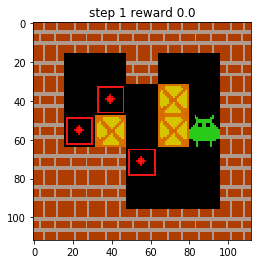

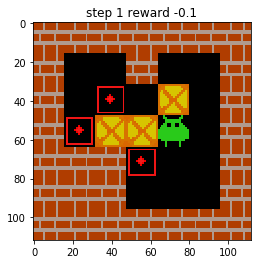

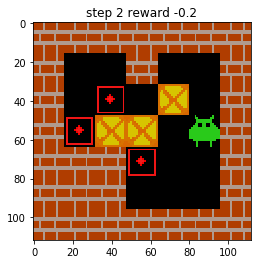

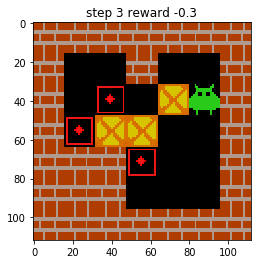

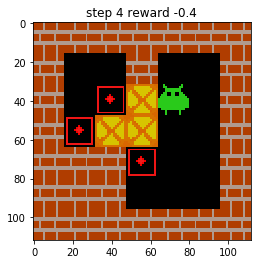

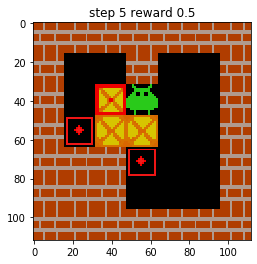

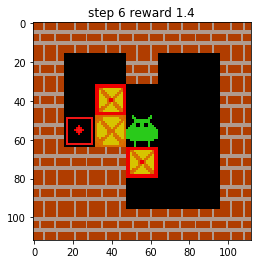

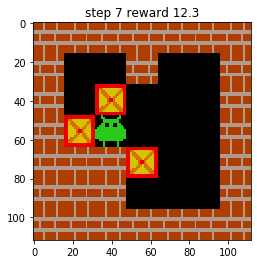

In [5]:
INTERACTIVE = False

done = False

total_reward = 0
step = 1

displayImage(env.render('rgb_array'), step, total_reward)

while not done:
    if INTERACTIVE:
        x = input()
        clear_output()
        try:
            keys[x]
        except:
            print("Only 'w' 'a' 's' 'd'")
            continue
        action = keys[x]
    else:
        action = result[step - 1]

    next_state, reward, done, _ = env.step(action)
    total_reward += reward
    displayImage(next_state, step, total_reward)
    step += 1
